In [2]:
import pandas as pd

In [3]:
dfml = pd.read_csv('./encoded_heart.csv')
dfml.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


In [4]:
# split data
from sklearn.model_selection import train_test_split

X = dfml.drop('HeartDisease', axis=1)
y = dfml['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=420)

In [5]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# define model
LR_model = LogisticRegression(max_iter=1000)
# fit model
LR_model.fit(X_train, y_train)
# make predictions
LR_preds = LR_model.predict(X_test)

In [6]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# define model
RF_clf = RandomForestClassifier(random_state=420)
# fit model
RF_clf.fit(X_train, y_train)
# make predictions
RF_preds = RF_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score 

# check overall accuracy %
LR_acc = accuracy_score(y_test, LR_preds)
RF_acc = accuracy_score(y_test, RF_preds)

print("Logistic Regression: ", LR_acc, "\nRandom Forest: ", RF_acc)


Logistic Regression:  0.8641304347826086 
Random Forest:  0.8913043478260869


# Evaluation Metrics

## Confusion Matrix

**Confusion matrix** is a table to display the predictions against the true results. This 2D array can be converted into a Pandas DataFrame, and nicely visualized in a heatmap. Remember, we're looking for:

| Label | Actual | Pred |
| --- | --- | --- |
| True Positive | 1 | 1 |
| False Positive | 1 | 0 |
| True Negative | 0 | 0 |
| False Negative | 0 | 1 |


In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, LR_preds)
cm

array([[62, 17],
       [ 8, 97]])

In [9]:
# confirm TP/TN/FP/FN totals

compare = pd.concat([pd.Series(LR_preds), y_test.reset_index(drop=True)], axis="columns")

def self_cm(row):
    pred, actual = row.items()
    if pred[1] == 1:
        return "TP" if pred[1] == actual[1] else "FP"
    else:
        return "TN" if pred[1] == actual[1] else "FN"

CM_col = compare.apply(self_cm, axis=1)

CM_col.value_counts()

TP    97
TN    62
FP    17
FN     8
Name: count, dtype: int64

In [10]:
cm_df = pd.DataFrame(cm,
  index = ["Negative","Positive"],
  columns = ["Negative","Positive"]
)
cm_df

,Negative,Positive
Negative,62,17
Positive,8,97


SciKit Learn actually include [a function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to generate a heatmap. Under the hood this is just using Matplotlib, but if you prefer, you can still manually create your own Seaborn Heatmap plot, then you will have more precise control. 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay

# disp = ConfusionMatrixDisplay(cm, display_labels=["negative", "positive"])
# disp.plot()
# plt.title('Heart Disease Confusion Matrix')
# plt.show()

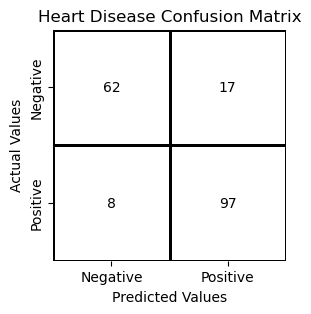

In [15]:
plt.figure(figsize=(3,3))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df, annot=True, cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
plt.title('Heart Disease Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Classification Report

**Classification report** introduces some [additional metrics](https://klu.ai/glossary/accuracy-precision-recall-f1) other than **accuracy** that we can use to gauge the performance of our model. Depending on the purpose of our model, it might be necessary for us to prioritize certain results. 

In [16]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, LR_preds))

report = classification_report(y_test, LR_preds)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        79
           1       0.85      0.92      0.89       105

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86       184
weighted avg       0.87      0.86      0.86       184



What do these numbers mean? Imagine our model has made some predictions that can be summarized something like this:

![preds](https://drive.google.com/thumbnail?id=1tESp6lhdls6mt_LFPPtoFgV2wfoZ2V80&sz=s4000)

**Precision** gives a score calculated by comparing how many _accurate predictions_ were made for that class against the _total_ number of times that class was predicted. You would use precision to gauge performance when the "quality" of your class predictions is the priority, i.e. when your model predicts positive, it is important that prediction be correct (e.g. spam detection). Use the formula `TP / (TP + FP)`. 

![precision](https://drive.google.com/thumbnail?id=1FfqdBEZBCFKx_jRZZYVcCxGOb6WnDZK0&sz=s4000)

**Recall** gives a score calculated by comparing the number of _accurate predictions_ for a single class against the number of _actual_ results for that class. You would use recall to gauge performance when the "quantity" of your class predictions is the priority, i.e. the model should accurately predict majority of the class, even if it then inaccurately includes false predictions of the alternative class/es (e.g. medical diagnosis). Use the formula `TP / (TP + FN)`.

![100% recall](https://drive.google.com/thumbnail?id=1b5LuM5qx2v71EXejZJM_BO5DkwDHrtOH&sz=s4000)

**F1 Score** is the harmonic mean of both precision and recall, it gives a better overall reading than accuracy for imbalanced datasets (particularly when one target class is underrepresented). You would use the F1 score to gauge performance when neither class out-weighs the other in priority.

## Cohen's Kappa Coefficient

[Cohen's Kappa](https://builtin.com/data-science/cohens-kappa) gives a score to judge the reliability of the prediction results, essentially to make sure the model hasn't just gotten some good results purely by chance. SciKit Learn offer a [a function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html) to calculate this.

In [17]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, LR_preds))

0.7187576424553681


# Evaluation Actions

After evaluating your first control model, you might want to consider some ways to improve performance. 

## Data Normalization

**Data normalization** or **Feature Scaling** is the process of adjusting the values in columns using different scales to use a common scale. This is to prevent the ML model from adding weight to features with larger numbers. The difference between values within a single column will stay equivalent.

You should normalize your training and testing data sets **separately**. This is to prevent **data leakage**, which is where information from _outside_ the training set influences the model's training. If you normalize your data _before_ splitting, then the mean and variance will be calculated based on the whole dataset, which is reflected in the values of the normalized data. 

SciKit Learn provides functions to perform both [**Standardization**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and [**Min Max Scaling**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). These functions will transform the data into a 2D Numpy array, which can still be fitted to the model the same as a Pandas Dataframe. 

In [18]:
X_test.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
314,53,1,80,0,0,141,1,2.0,0,0,0,1,0,0,0
403,52,1,135,0,1,128,1,2.0,0,0,0,1,0,1,0
82,63,1,150,223,0,115,0,0.0,0,0,0,1,0,1,0
454,58,1,136,203,1,123,1,1.2,0,0,0,1,0,1,0
498,67,1,160,384,1,130,1,0.0,0,0,0,0,1,1,0


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

pd.DataFrame(X_test_scaled, columns=X_test.columns).head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.520833,1.0,0.000000,0.000000,0.0,0.578125,1.0,0.56,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,1.0,0.458333,0.000000,1.0,0.476562,1.0,0.56,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.729167,1.0,0.583333,0.534772,0.0,0.375000,0.0,0.16,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.625000,1.0,0.466667,0.486811,1.0,0.437500,1.0,0.40,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.812500,1.0,0.666667,0.920863,1.0,0.492188,1.0,0.16,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## SMOTE 

**Synthetic Minority Oversampling Technique**, more commonly known as [**SMOTE**](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/), is a technique used to balance imbalanced datasets. Rather than simply duplicating minority samples, we can synthetically generate new ones in a range between two existing samples. Minority oversampling will sometimes be combined with random **majority undersampling**, which will trim some samples from the majority class to improve the balance. 

To perform SMOTE using SciKit Learn, you will need to install `imbalanced-learn` in your project's Anaconda environment, which has a [SMOTE oversampling method](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

## Stratified K-Fold

For imbalanced datasets, you can consider splitting the data using a [**stratified k-fold**](https://medium.com/@juanc.olamendy/a-comprehensive-guide-to-stratified-k-fold-cross-validation-for-unbalanced-data-014691060f17). This will ensure a more even distribution of minority classes in both training and testing data. This involves [a bit more work](https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/), but SciKit Learn do provide [a function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold) to assist with this. 

Using K-Fold Cross Validation can give you a max and min potential model performance score, and you can calculate the mean of all folds. 